In [1]:
train_list = 'data/robot-data/data_RGB/sequence_list.txt'
val_list = 'data/robot-data/data_RGB/test_seq.txt'
test_list = 'data/robot-data/data_RGB/test_seq2.txt'

# train_list = 'data/TREK-150/origin_seq.txt'
# val_list = 'data/TREK-150/test_seq.txt'
# test_list = 'data/TREK-150/test_seq2.txt'

In [2]:
import glob

def read_txt_trek(lists):
    with open(lists, 'r') as f:
        train_folders =f.read().splitlines()
    train_txts = []
    for i in range(len(train_folders)):
        foldername = train_folders[i].split('-')[0]
        train_txts.append('data/TREK-150/'+foldername+'/'+train_folders[i]+'/groundtruth_rect.txt')
    
    train_pos = 0
    train_neg = 0
    train_lists = {}

    for j in range(len(train_txts)):      
        with open(train_txts[j], 'r') as f:
            whole_ = f.read().splitlines()
        name = '/'.join(train_txts[j].split('/')[-3:-1])
        train_lists[name+'_pos'] = 0
        train_lists[name+'_neg'] = 0

        for k in range(len(whole_)):
            num = int(whole_[k].split(',')[0])
            if num>=0:
                train_pos +=1
                train_lists[name+'_pos'] +=1
            else:
                train_neg +=1
                train_lists[name+'_neg'] +=1
    return train_pos, train_neg, train_lists

def read_noun_trek(lists):
    with open(lists, 'r') as f:
        train_folders =f.read().splitlines()
    train_txts = []
    for i in range(len(train_folders)):
        foldername = train_folders[i].split('-')[0]
        train_txts.append('data/TREK-150/'+foldername+'/'+train_folders[i]+'/action_target.txt')
    
    train_lists = {}

    for j in range(len(train_txts)):      
        with open(train_txts[j], 'r') as f:
            whole_ = f.read().splitlines()
        name = '/'.join(train_txts[j].split('/')[-3:-1])

        target_noun = int(whole_[2])
        if target_noun in train_lists:
            train_lists[target_noun] += 1
        else:
            train_lists[target_noun] = 1

    return train_lists

def read_txt(lists):
    with open(lists, 'r') as f:
        train_folders =f.read().splitlines()
    train_txts = []
    for i in range(len(train_folders)):
        train_txts.append('data/robot-data/data_RGB/'+train_folders[i]+'/groundtruth.txt')
    
    train_pos = 0
    train_neg = 0
    train_lists = {}

    for j in range(len(train_txts)):      
        with open(train_txts[j], 'r') as f:
            whole_ = f.read().splitlines()
        name = '/'.join(train_txts[j].split('/')[-3:-1])
        train_lists[name+'_pos'] = 0
        train_lists[name+'_neg'] = 0

        for k in range(len(whole_)):
            num = int(whole_[k].split('\t')[0])
            if num>=0:
                train_pos +=1
                train_lists[name+'_pos'] +=1
            else:
                train_neg +=1
                train_lists[name+'_neg'] +=1
    return train_pos, train_neg, train_lists


In [6]:
#tp, tn, td = read_txt_trek(train_list)
vp, vn, vd = read_txt(val_list)
tp, tn, td = read_txt(test_list)
#noun = read_noun_trek(train_list)

#print(tp, tn, td)
# print(noun)
# print('\n\n')
# print(vp, vn, vd)
# print('\n\n')
# print(ttp, ttn, ttd)
# print('\n\n')

# print(ttp)

In [5]:
sortednoun = list(noun.keys())
sortednoun.sort()
print(sortednoun)
print(len(sortednoun))


NameError: name 'noun' is not defined

In [7]:
import csv

header = ['noun_id','before_id']
with open('convert.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for i, j in enumerate(sortednoun):
        writer.writerow([i, j])

NameError: name 'sortednoun' is not defined

In [8]:
negatives = []
positives = []

human_negative = []
human_positive = []
for key, value in td.items():
    if 'neg' in key and value >0:
        #print(td[key[:-3]+'pos'])
        print(key, td[key[:-3]+'pos'], value)
        if 'human' in key:
            human_negative.append(value)
            human_positive.append(td[key[:-3]+'pos'])
        else:
            negatives.append(value)
            positives.append(td[key[:-3]+'pos'])
        
for key, value in vd.items():
    if 'neg' in key and value >0:
        #print(td[key[:-3]+'pos'])
        print(key, vd[key[:-3]+'pos'], value)
        if 'human' in key:
            human_negative.append(value)
            human_positive.append(vd[key[:-3]+'pos'])
        else:
            negatives.append(value)
            positives.append(vd[key[:-3]+'pos'])

auto/OrangeBall-8-23-19-20-36_neg 195 26
auto/BlueBall-8-23-19-24-34_neg 204 25
auto/BeigeCube-8-23-18-35-7_neg 234 27
auto/TennisBall-8-23-19-10-44_neg 194 20
auto/Spam-8-23-18-52-38_neg 229 22
auto-prev/Brick-6-6-22-6-56_neg 316 36
auto-prev/Bus-6-6-22-5-33_neg 290 51
auto-prev/Potato-6-7-2-18-41_neg 273 62
auto-prev/PurpleCylinder-6-7-2-1-24_neg 340 52
auto-nogetj/FireTruck-6-3-10-18-7_neg 310 44
human-prev/TomatoSoupCan-6-6-21-38-1_neg 1006 165
human-prev/BlueCup-6-6-21-40-56_neg 611 565
human-prev/FireTruck-6-6-21-34-56_neg 1027 144
auto/Spam-8-23-18-21-25_neg 195 33
auto/OrangeBall-8-23-19-24-59_neg 205 26
auto/TennisBall-8-23-19-24-10_neg 201 19
auto/BeigeCube-8-23-15-3-15_neg 137 120
auto/BeigeCube-8-23-14-42-26_neg 130 127
auto/TennisBall-8-23-19-20-11_neg 207 20
human/TennisBall-8-20-15-59-30_neg 221 27
human/BeigeCube-8-20-18-16-28_neg 232 20
human/BeigeCube-8-20-18-13-38_neg 202 49
auto-prev/FireTruck-6-7-2-9-52_neg 270 67
auto-prev/Potato-6-7-1-51-40_neg 304 44
auto-prev/B

In [9]:
import numpy as np
negatives =np.array(negatives)
positives =np.array(positives)
eal = np.mean(negatives)
avl = np.mean(negatives + positives)
mieal = np.min(negatives)
mael = np.max(negatives)

print(eal, avl, mieal, mael)

51.24 303.08 19 191


In [10]:
negatives =np.array(human_negative)
positives =np.array(human_positive)
eal = np.mean(negatives)
avl = np.mean(negatives + positives)
mieal = np.min(negatives)
mael = np.max(negatives)

print(eal, avl, mieal, mael)

161.66666666666666 711.5 20 565


test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/TennisBall-8-23-19-10-44_conf_score.txt test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/TennisBall-8-23-19-10-44_visgt.txt


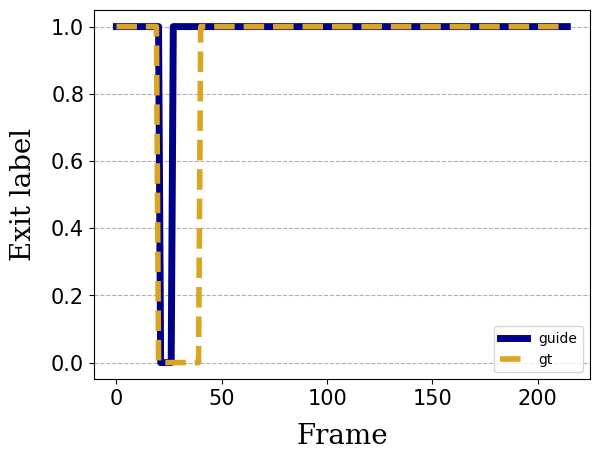

In [41]:
from cProfile import label
import glob
from sre_constants import SRE_INFO_CHARSET
# file_path = glob.glob('test/tracking_results/stark_st/*/*/*/*_conf_score.txt')
# gt_path = glob.glob('test/tracking_results/stark_st/*/*/*/*_visgt.txt')

file_path = glob.glob('test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/TennisBall-8-23-19-10-44_conf_score.txt')
gt_path = glob.glob('test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/TennisBall-8-23-19-10-44_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        guide = (b>=0.5).astype(float)
        
        # plt.plot(guide, label="guide", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 5, linestyle='--')
        plt.plot(guide, label="guide", color="darkblue", linewidth = 5)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')

        plt.xlabel('Frame', labelpad=10, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=10, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        
        break
plt.savefig('test/datas/230501_graph/tennis_stark.png', bbox_inches='tight', dpi=300)

test/tracking_results/exotst_tracker/baseline_mix_sim/EXOTST_ep0060/auto/TennisBall-8-23-19-10-44_conf_score.txt test/tracking_results/exotst_tracker/baseline_mix_sim/EXOTST_ep0060/auto/TennisBall-8-23-19-10-44_visgt.txt


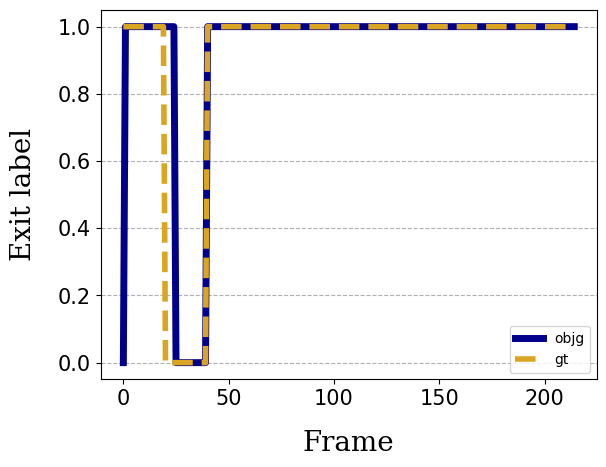

In [42]:
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

data = np.array([10,5,8,9,15,22,26,11,15,16,18,7])

#print(moving_average(data,4))

file_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_sim/EXOTST_ep0060/auto/TennisBall-8-23-19-10-44_conf_score.txt')
obj_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_sim/EXOTST_ep0060/auto/TennisBall-8-23-19-10-44_objconf.txt')
gt_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_sim/EXOTST_ep0060/auto/TennisBall-8-23-19-10-44_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        with open(obj_path[i], 'r') as f:
            obj = np.loadtxt(f)
        guide = (b>=0.5).astype(float)
        
        objg = moving_average(obj, 20)
        objg = (objg>=0.54).astype(float)
        if len(objg) < len(gt):
            num = len(gt)-len(objg)
            objg = np.pad(objg, (0, num), 'edge')
        # plt.plot(guide)
        # plt.plot(objg,label="objg", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 3, linestyle='--')
        plt.plot(objg,label="objg", color="darkblue", linewidth = 5)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')
        #plt.plot(guide, label="guide", color="CornflowerBlue", linewidth = 5)
        #plt.plot(gt, label = "gt", color = "pink", linewidth = 5)
        
        plt.xlabel('Frame', labelpad=15, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=15, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        # plt.show()
    
        break

plt.savefig('test/datas/230501_graph/sim60Tennis_exot.png', bbox_inches='tight', dpi=300)
    # print(b.shape, b)



test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto-prev/Brick-6-6-22-6-56_conf_score.txt test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto-prev/Brick-6-6-22-6-56_visgt.txt


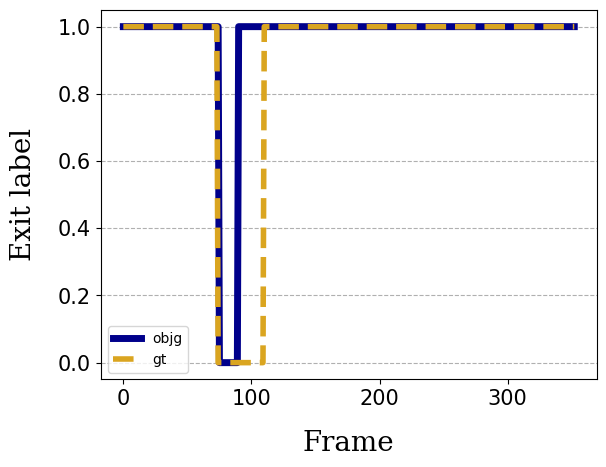

In [43]:
import glob
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

data = np.array([10,5,8,9,15,22,26,11,15,16,18,7])

#print(moving_average(data,4))

file_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto-prev/Brick-6-6-22-6-56_conf_score.txt')
obj_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto-prev/Brick-6-6-22-6-56_objconf.txt')
gt_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto-prev/Brick-6-6-22-6-56_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        with open(obj_path[i], 'r') as f:
            obj = np.loadtxt(f)
        guide = (b>=0.5).astype(float)
        
        objg = moving_average(obj, 20)
        objg = (objg>=8.6).astype(float)
        if len(objg) < len(gt):
            num = len(gt)-len(objg)
            objg = np.pad(objg, (0, num), 'edge')
        # plt.plot(guide)
        # plt.plot(objg,label="objg", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 3, linestyle='--')
        plt.plot(objg,label="objg", color="darkblue", linewidth = 5)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')
        #plt.plot(guide, label="guide", color="CornflowerBlue", linewidth = 5)
        #plt.plot(gt, label = "gt", color = "pink", linewidth = 5)
        
        plt.xlabel('Frame', labelpad=15, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=15, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        # plt.show()
    
        break

plt.savefig('test/datas/230501_graph/lowdim27Brick_exot.png', bbox_inches='tight', dpi=300)
    # print(b.shape, b)

test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto-prev/Brick-6-6-22-6-56_conf_score.txt test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto-prev/Brick-6-6-22-6-56_visgt.txt


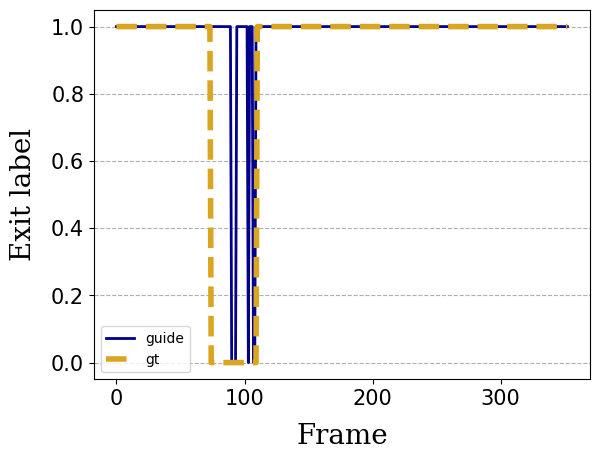

In [44]:
from cProfile import label
import glob
from sre_constants import SRE_INFO_CHARSET
# file_path = glob.glob('test/tracking_results/stark_st/*/*/*/*_conf_score.txt')
# gt_path = glob.glob('test/tracking_results/stark_st/*/*/*/*_visgt.txt')

file_path = glob.glob('test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto-prev/Brick-6-6-22-6-56_conf_score.txt')
gt_path = glob.glob('test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto-prev/Brick-6-6-22-6-56_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        guide = (b>=0.5).astype(float)
        
        # plt.plot(guide, label="guide", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 5, linestyle='--')
        plt.plot(guide, label="guide", color="darkblue", linewidth = 2)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')

        plt.xlabel('Frame', labelpad=10, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=10, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        
        break
plt.savefig('test/datas/230501_graph/Brick_stark.png', bbox_inches='tight', dpi=300)

test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/OrangeBall-8-23-19-20-36_conf_score.txt test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/OrangeBall-8-23-19-20-36_visgt.txt


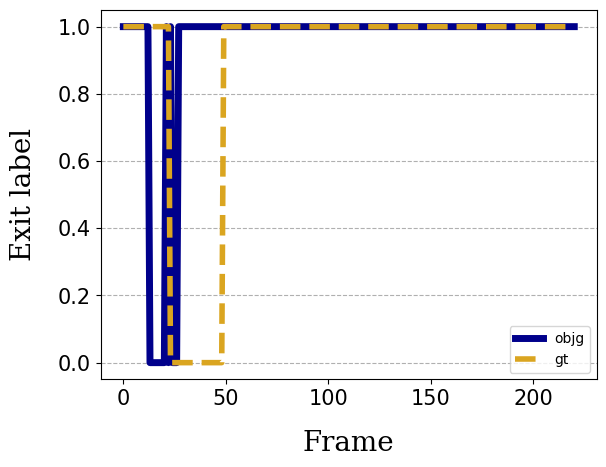

In [45]:
import glob
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

data = np.array([10,5,8,9,15,22,26,11,15,16,18,7])

#print(moving_average(data,4))

file_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/OrangeBall-8-23-19-20-36_conf_score.txt')
obj_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/OrangeBall-8-23-19-20-36_objconf.txt')
gt_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/OrangeBall-8-23-19-20-36_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        with open(obj_path[i], 'r') as f:
            obj = np.loadtxt(f)
        guide = (b>=0.5).astype(float)
        
        objg = moving_average(obj, 20)
        objg = (objg>=4).astype(float)
        if len(objg) < len(gt):
            num = len(gt)-len(objg)
            objg = np.pad(objg, (0, num), 'edge')
        # plt.plot(guide)
        # plt.plot(objg,label="objg", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 3, linestyle='--')
        plt.plot(objg,label="objg", color="darkblue", linewidth = 5)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')
        #plt.plot(guide, label="guide", color="CornflowerBlue", linewidth = 5)
        #plt.plot(gt, label = "gt", color = "pink", linewidth = 5)
        
        plt.xlabel('Frame', labelpad=15, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=15, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        # plt.show()
    
        break

plt.savefig('test/datas/230501_graph/lowdim27Orangeball_exot.png', bbox_inches='tight', dpi=300)
    # print(b.shape, b)

test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/OrangeBall-8-23-19-20-36_conf_score.txt test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/OrangeBall-8-23-19-20-36_visgt.txt


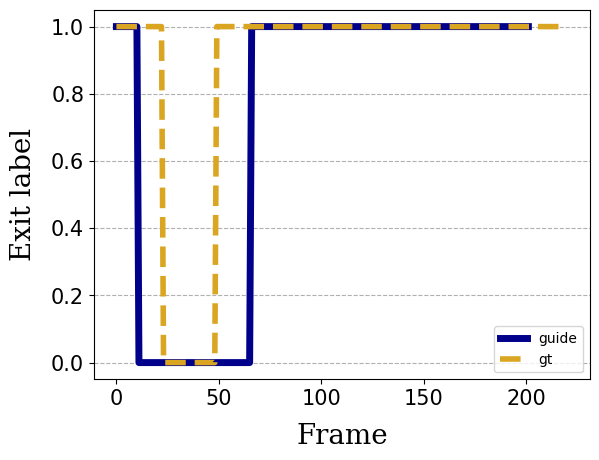

In [46]:
from cProfile import label
import glob
from sre_constants import SRE_INFO_CHARSET
# file_path = glob.glob('test/tracking_results/stark_st/*/*/*/*_conf_score.txt')
# gt_path = glob.glob('test/tracking_results/stark_st/*/*/*/*_visgt.txt')

file_path = glob.glob('test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/OrangeBall-8-23-19-20-36_conf_score.txt')
gt_path = glob.glob('test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/OrangeBall-8-23-19-20-36_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        b = moving_average(b, 20)
        guide = (b>=0.5).astype(float)
        
        # plt.plot(guide, label="guide", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 5, linestyle='--')
        plt.plot(guide, label="guide", color="darkblue", linewidth = 5)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')

        plt.xlabel('Frame', labelpad=10, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=10, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        
        break
plt.savefig('test/datas/230501_graph/Orangeball_stark.png', bbox_inches='tight', dpi=300)

test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/human-prev/TomatoSoupCan-6-6-21-38-1_conf_score.txt test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/human-prev/TomatoSoupCan-6-6-21-38-1_visgt.txt


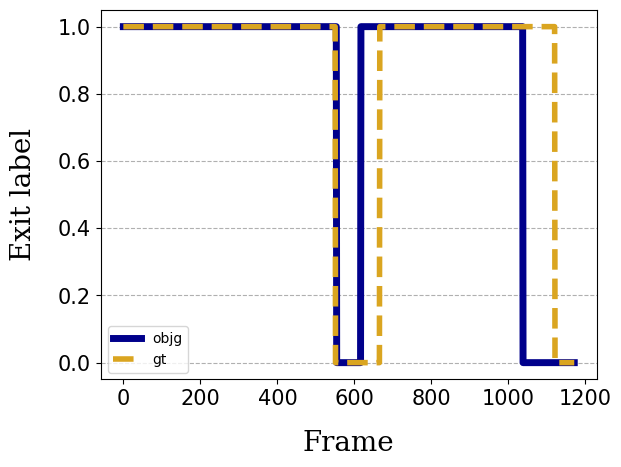

In [47]:
import glob
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

data = np.array([10,5,8,9,15,22,26,11,15,16,18,7])

#print(moving_average(data,4))

file_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/human-prev/TomatoSoupCan-6-6-21-38-1_conf_score.txt')
obj_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/human-prev/TomatoSoupCan-6-6-21-38-1_objconf.txt')
gt_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/human-prev/TomatoSoupCan-6-6-21-38-1_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        with open(obj_path[i], 'r') as f:
            obj = np.loadtxt(f)
        guide = (b>=0.5).astype(float)
        
        objg = moving_average(obj, 40)
        objg = (objg>=8.5).astype(float)
        if len(objg) < len(gt):
            num = len(gt)-len(objg)
            objg = np.pad(objg, (0, num), 'edge')
        # plt.plot(guide)
        # plt.plot(objg,label="objg", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 3, linestyle='--')
        plt.plot(objg,label="objg", color="darkblue", linewidth = 5)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')
        #plt.plot(guide, label="guide", color="CornflowerBlue", linewidth = 5)
        #plt.plot(gt, label = "gt", color = "pink", linewidth = 5)
        
        plt.xlabel('Frame', labelpad=15, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=15, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        # plt.show()
    
        break

plt.savefig('test/datas/230501_graph/lowdim27Tomatosoup_exot.png', bbox_inches='tight', dpi=300)
    # print(b.shape, b)

test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/human-prev/TomatoSoupCan-6-6-21-38-1_conf_score.txt test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/human-prev/TomatoSoupCan-6-6-21-38-1_visgt.txt


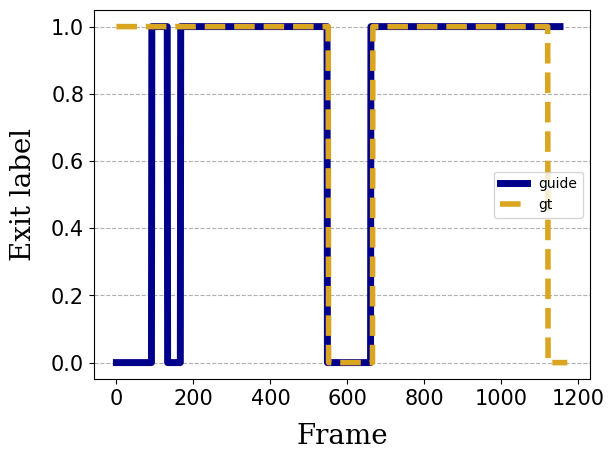

In [48]:
from cProfile import label
import glob
from sre_constants import SRE_INFO_CHARSET
# file_path = glob.glob('test/tracking_results/stark_st/*/*/*/*_conf_score.txt')
# gt_path = glob.glob('test/tracking_results/stark_st/*/*/*/*_visgt.txt')

file_path = glob.glob('test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/human-prev/TomatoSoupCan-6-6-21-38-1_conf_score.txt')
gt_path = glob.glob('test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/human-prev/TomatoSoupCan-6-6-21-38-1_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        b = moving_average(b, 20)
        guide = (b>=0.5).astype(float)
        
        # plt.plot(guide, label="guide", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 5, linestyle='--')
        plt.plot(guide, label="guide", color="darkblue", linewidth = 5)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')

        plt.xlabel('Frame', labelpad=10, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=10, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        
        break
plt.savefig('test/datas/230501_graph/Tomatosoup_stark.png', bbox_inches='tight', dpi=300)

test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/BlueBall-8-23-19-24-34_conf_score.txt test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/BlueBall-8-23-19-24-34_visgt.txt


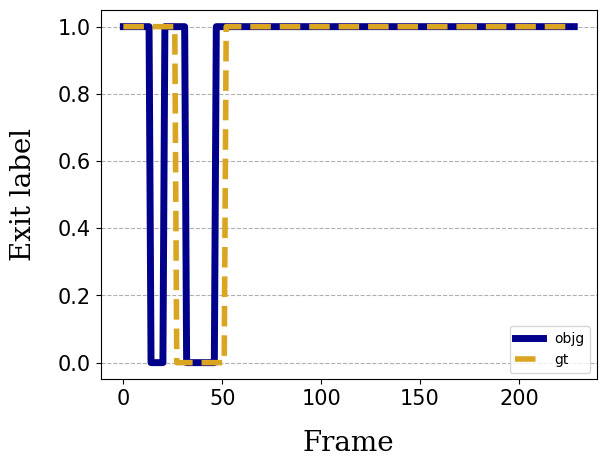

In [49]:
import glob
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

data = np.array([10,5,8,9,15,22,26,11,15,16,18,7])

#print(moving_average(data,4))

file_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/BlueBall-8-23-19-24-34_conf_score.txt')
obj_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/BlueBall-8-23-19-24-34_objconf.txt')
gt_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/BlueBall-8-23-19-24-34_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        with open(obj_path[i], 'r') as f:
            obj = np.loadtxt(f)
        guide = (b>=0.5).astype(float)
        
        objg = moving_average(obj, 20)
        objg = (objg>=4.2).astype(float)
        if len(objg) < len(gt):
            num = len(gt)-len(objg)
            objg = np.pad(objg, (0, num), 'edge')
        # plt.plot(guide)
        # plt.plot(objg,label="objg", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 3, linestyle='--')
        plt.plot(objg,label="objg", color="darkblue", linewidth = 5)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')
        #plt.plot(guide, label="guide", color="CornflowerBlue", linewidth = 5)
        #plt.plot(gt, label = "gt", color = "pink", linewidth = 5)
        
        plt.xlabel('Frame', labelpad=15, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=15, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        # plt.show()
    
        break

plt.savefig('test/datas/230501_graph/lowdim27Blueball_exot.png', bbox_inches='tight', dpi=300)
    # print(b.shape, b)

test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/BlueBall-8-23-19-24-34_conf_score.txt test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/BlueBall-8-23-19-24-34_visgt.txt


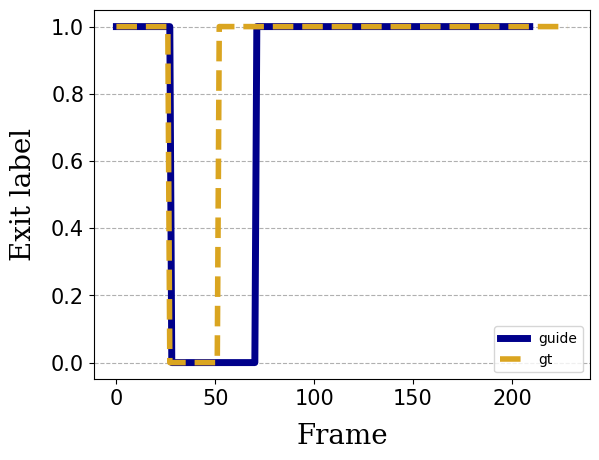

In [50]:
from cProfile import label
import glob
from sre_constants import SRE_INFO_CHARSET
# file_path = glob.glob('test/tracking_results/stark_st/*/*/*/*_conf_score.txt')
# gt_path = glob.glob('test/tracking_results/stark_st/*/*/*/*_visgt.txt')

file_path = glob.glob('test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/BlueBall-8-23-19-24-34_conf_score.txt')
gt_path = glob.glob('test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/BlueBall-8-23-19-24-34_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        b = moving_average(b, 20)
        guide = (b>=0.5).astype(float)
        
        # plt.plot(guide, label="guide", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 5, linestyle='--')
        plt.plot(guide, label="guide", color="darkblue", linewidth = 5)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')

        plt.xlabel('Frame', labelpad=10, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=10, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        
        break
plt.savefig('test/datas/230501_graph/Blueball_stark.png', bbox_inches='tight', dpi=300)

test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/BeigeCube-8-23-18-35-7_conf_score.txt test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/BeigeCube-8-23-18-35-7_visgt.txt


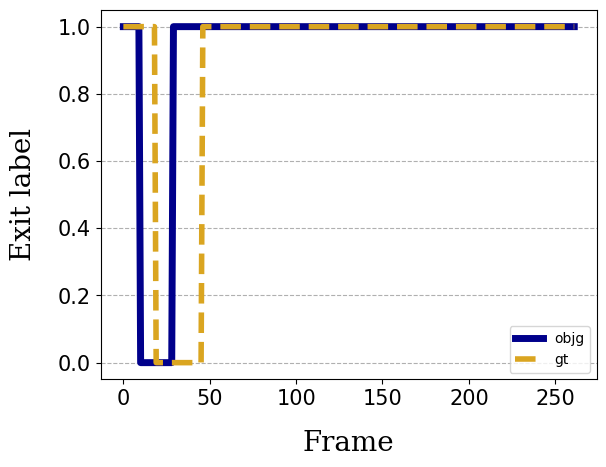

In [51]:
import glob
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

data = np.array([10,5,8,9,15,22,26,11,15,16,18,7])

#print(moving_average(data,4))

file_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/BeigeCube-8-23-18-35-7_conf_score.txt')
obj_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/BeigeCube-8-23-18-35-7_objconf.txt')
gt_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_lowdim/EXOTST_epoch=27/auto/BeigeCube-8-23-18-35-7_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        with open(obj_path[i], 'r') as f:
            obj = np.loadtxt(f)
        guide = (b>=0.5).astype(float)
        
        objg = moving_average(obj, 20)
        objg = (objg>=9.2).astype(float)
        if len(objg) < len(gt):
            num = len(gt)-len(objg)
            objg = np.pad(objg, (0, num), 'edge')
        # plt.plot(guide)
        # plt.plot(objg,label="objg", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 3, linestyle='--')
        plt.plot(objg,label="objg", color="darkblue", linewidth = 5)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')
        #plt.plot(guide, label="guide", color="CornflowerBlue", linewidth = 5)
        #plt.plot(gt, label = "gt", color = "pink", linewidth = 5)
        
        plt.xlabel('Frame', labelpad=15, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=15, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        # plt.show()
    
        break

plt.savefig('test/datas/230501_graph/lowdim27Beigecube_exot.png', bbox_inches='tight', dpi=300)

test/tracking_results/exotst_tracker/baseline_mix_enc/EXOTST_ep0040/auto/BeigeCube-8-23-18-35-7_conf_score.txt test/tracking_results/exotst_tracker/baseline_mix_enc/EXOTST_ep0040/auto/BeigeCube-8-23-18-35-7_visgt.txt


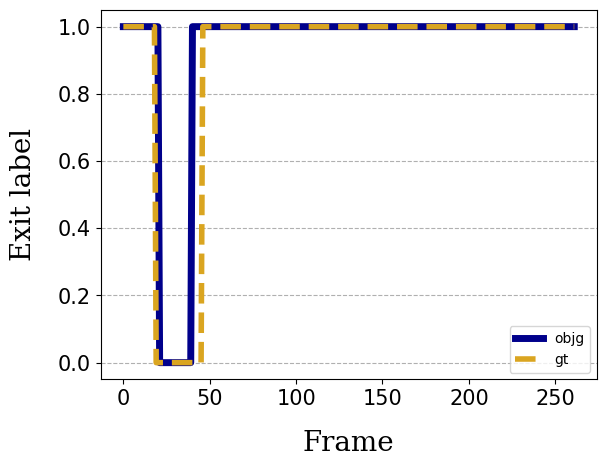

In [52]:
import glob
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

data = np.array([10,5,8,9,15,22,26,11,15,16,18,7])

#print(moving_average(data,4))

file_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_enc/EXOTST_ep0040/auto/BeigeCube-8-23-18-35-7_conf_score.txt')
obj_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_enc/EXOTST_ep0040/auto/BeigeCube-8-23-18-35-7_objconf.txt')
gt_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_enc/EXOTST_ep0040/auto/BeigeCube-8-23-18-35-7_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        with open(obj_path[i], 'r') as f:
            obj = np.loadtxt(f)
        guide = (b>=0.5).astype(float)
        
        objg = moving_average(obj, 20)
        objg = (objg>=4).astype(float)
        if len(objg) < len(gt):
            num = len(gt)-len(objg)
            objg = np.pad(objg, (0, num), 'edge')
        # plt.plot(guide)
        # plt.plot(objg,label="objg", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 3, linestyle='--')
        plt.plot(objg,label="objg", color="darkblue", linewidth = 5)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')
        #plt.plot(guide, label="guide", color="CornflowerBlue", linewidth = 5)
        #plt.plot(gt, label = "gt", color = "pink", linewidth = 5)
        
        plt.xlabel('Frame', labelpad=15, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=15, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        # plt.show()
    
        break

plt.savefig('test/datas/230501_graph/enc40Beigecube_exot.png', bbox_inches='tight', dpi=300)

test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/BeigeCube-8-23-18-35-7_conf_score.txt test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/BeigeCube-8-23-18-35-7_visgt.txt


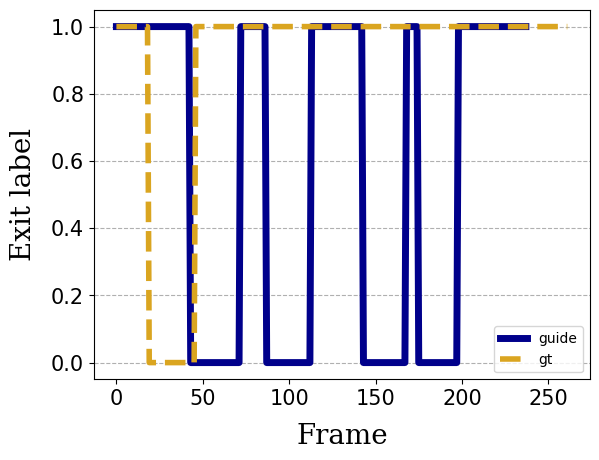

In [53]:
from cProfile import label
import glob
from sre_constants import SRE_INFO_CHARSET
# file_path = glob.glob('test/tracking_results/stark_st/*/*/*/*_conf_score.txt')
# gt_path = glob.glob('test/tracking_results/stark_st/*/*/*/*_visgt.txt')

file_path = glob.glob('test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/BeigeCube-8-23-18-35-7_conf_score.txt')
gt_path = glob.glob('test/tracking_results/stark_st/baseline_mix/STARKST_epoch=49-v1/auto/BeigeCube-8-23-18-35-7_visgt.txt')
file_path.sort()
gt_path.sort()
# print(file_path)
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(file_path)):
    if 'mix' in file_path[i]:
        print(file_path[i], gt_path[i])
        with open(file_path[i], 'r') as f:
            b = np.loadtxt(f)
        with open(gt_path[i], 'r') as f:
            gt = np.loadtxt(f)
        b = moving_average(b, 25)
        guide = (b>=0.498).astype(float)
        
        # plt.plot(guide, label="guide", color="forestgreen", linewidth = 5)
        # plt.plot(gt, label = "gt", color = "palevioletred", linewidth = 5, linestyle='--')
        plt.plot(guide, label="guide", color="darkblue", linewidth = 5)
        plt.plot(gt, label = "gt", color = "goldenrod", linewidth = 4, linestyle='--')

        plt.xlabel('Frame', labelpad=10, font = 'serif', size='20')
        plt.ylabel('Exit label', labelpad=10, font = 'serif', size='20')
        plt.legend()
        plt.grid(True, axis='y', linestyle='--')
        plt.rc('xtick', labelsize=15)
        plt.rc('ytick', labelsize=15)
        
        break
plt.savefig('test/datas/230501_graph/Beigecube_stark.png', bbox_inches='tight', dpi=300)